# 1.) Pull in Data and Convert ot Monthly

In [29]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [31]:
#Difference in stockprice 
df["Diff"]=  df["Adj Close"].diff().shift(-1)

#Target up or down 
df["Target"]= np.sign(df["Diff"])

#Option Premium 

df["Premium"] = .08 * df["Adj Close"]

# 3.) Pull in X data, normalize and build a LogReg on column 2

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [33]:
X = pd.read_csv("~/Downloads/Xdata.csv", index_col="Date", parse_dates=["Date"])

In [34]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:"2023-09-30",:].copy()

In [35]:
logreg = LogisticRegression()

logreg.fit(X,y)

y_pred = logreg.predict(X)


# 4.) Add columns, prediction and profits.

In [36]:
df["Predictions"] = y_pred

In [37]:
df["Profits"] = 0
df.loc[(df["Predictions"]== 1) & (df["Target"] == 1), "Profits"] = df["Premium"]
df.loc[(df["Predictions"]== 1) & (df["Target"] == -1),"Profits"] = 100 * df["Diff"] + df["Premium"]



/var/folders/kg/nw1yx_m905d_swb006x0kf6r0000gn/T/ipykernel_52654/3872356485.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[6.77095473e-03 7.84186423e-03 4.21455026e-03 5.14728606e-03
 3.52368176e-03 3.73094290e-03 4.97456789e-03 5.04365563e-03
 7.01275527e-03 8.25644672e-03 1.12964594e-02 1.16764367e-02
 1.39564276e-02 9.63824451e-03 5.63095987e-03 6.73641086e-03
 6.84004068e-03 6.84004068e-03 7.04730034e-03 6.84004068e-03
 4.80185330e-03 4.14546371e-03 4.35278684e-03 5.14728606e-03
 5.56186914e-03 6.08002424e-03 6.39097631e-03 6.90912783e-03
 7.80731857e-03 8.36007714e-03 8.63642514e-03 9.25826848e-03
 9.56916034e-03 1.10545921e-02 1.11928296e-02 1.53382897e-02
 1.78255415e-02 2.18661404e-02 2.24196649e-02 2.28348899e-02
 2.99315524e-02 1.83313966e-02 2.30531359e-02 2.22636938e-02
 2.28202486e-02 2.31442952e-02 2.22799540e-02 2.10782814e-02
 2.00128174e-02 2.19087720e-02 2.23790550e-02 2.51126742e-02
 1.9234

# 5.) Plot profits over time

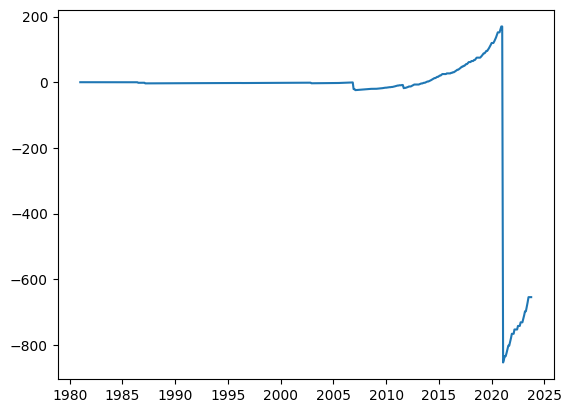

In [38]:
plt.plot(np.cumsum(df["Profits"]))

plt.show()

#Write a short write on how your skills from MQE, help mr lius ventures?

Some of the important points that could be help us contribute better would be: 
1. Quant skills - Technical background helping us understand the models and crypto framework. 
2. Prior experience in an asset management firm 
3. Trading and Quant background 
4. Worked in a different country in the investment space 

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.